### SARS-2 Austria 

C. Möstl, Graz, https://twitter.com/chrisoutofspace

In [73]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sunpy.time import parse_time
import datetime


def expon(x, a, k, b):
    return a*np.exp(k*x) + b


sns.set_style('darkgrid')
sns.set_context('paper')   

In [74]:
t_start=parse_time('2020-02-24 12:00').datetime
t_end=parse_time('2020-03-18 12:00').datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days)]).datetime
cases=[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016,1332, 1471]

dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 

param = scipy.optimize.curve_fit(expon, dates1, cases )

p1=param[0][0]
p2=param[0][1]
p3=param[0][2]

t_end2=parse_time('2020-04-01 12:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

fit=expon(dates_fut1,p1,p2,p3)
now=datetime.datetime.utcnow().strftime("%Y-%b-%d %H:%M")


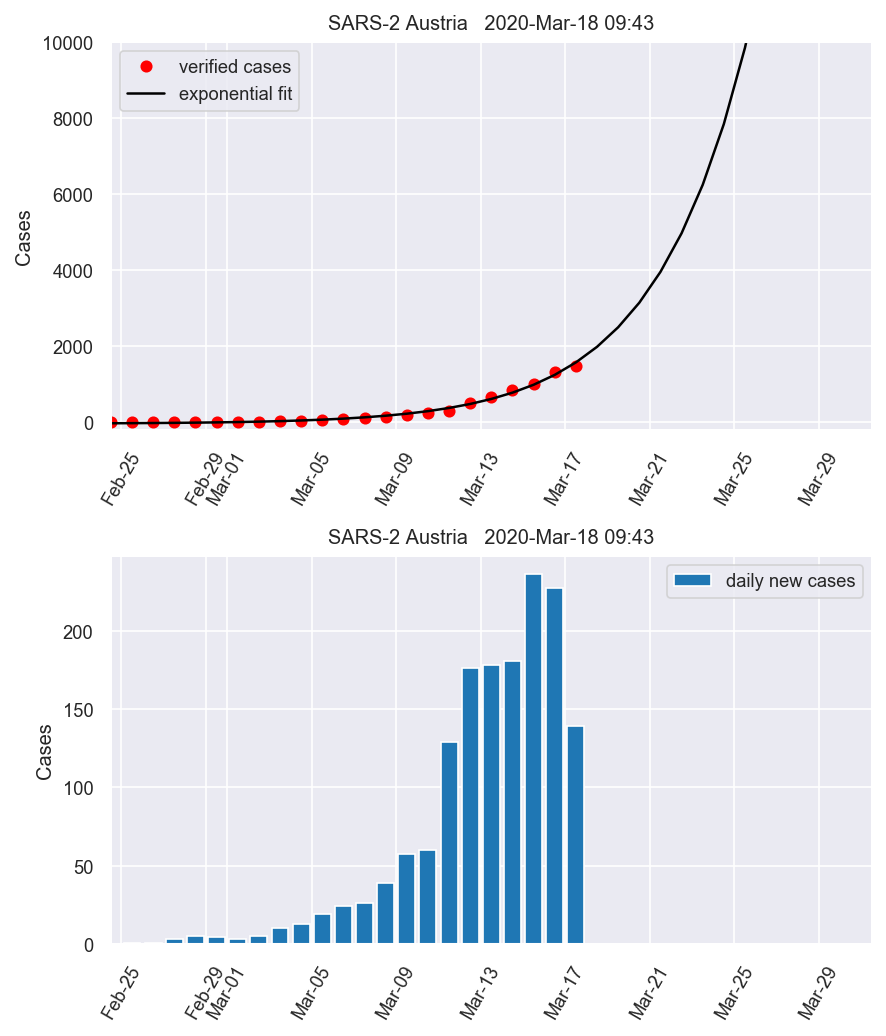

In [75]:
plt.figure(1,figsize=(6,7),dpi=150)
ax1 = plt.subplot(211) 

ax1.plot(dates,cases,'or',label='verified cases')
ax1.plot(dates_fut,fit,'-k',label='exponential fit')

ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_xlim([dates_fut[0],dates_fut[-1]])
plt.xticks(rotation=60)
plt.ylabel('Total cases')
plt.ylim(-200,10000)
plt.title('SARS-2 Austria   '+now)
plt.legend()


ax2 = plt.subplot(212) 

ax2.bar(dates,np.gradient(cases),label='daily new cases')
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )

plt.xticks(rotation=60)
plt.ylabel('New cases')
ax2.set_xlim([dates_fut[0],dates_fut[-1]])
plt.title('SARS-2 Austria   '+now)
plt.legend()

plt.tight_layout()
